<a href="https://colab.research.google.com/github/suhaaskarthik/Melanoma-AI-detection/blob/main/cancer_detection_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
zip_ref = zipfile.ZipFile('drive/MyDrive/melanoma-cancer.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import tensorflow as tf
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    'melanoma_cancer_dataset/train', label_mode = 'binary', image_size = (224,224), batch_size = 32
)
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    'melanoma_cancer_dataset/test', label_mode = 'binary', image_size = (224,224), batch_size = 32
)

Found 9605 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


## By transfer learning and fine-tuning ResNet50

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/5
301/301 [==============================] - 218s 683ms/step - loss: 0.3436 - accuracy: 0.8645 - val_loss: 0.3595 - val_accuracy: 0.9050
Epoch 2/5
301/301 [==============================] - 124s 412ms/step - loss: 0.2770 - accuracy: 0.8891 - val_loss: 0.3029 - val_accuracy: 0.9130
Epoch 3/5
301/301 [==============================] - 94s 310ms/step - loss: 0.2631 - accuracy: 0.8965 - val_loss: 0.2925 - val_accuracy: 0.9170
Epoch 4/5
301/301 [==============================] - 82s 272ms/step - loss: 0.2555 - accuracy: 0.8979 - val_loss: 0.2860 - val_accuracy: 0.9070
Epoch 5/5
301/301 [==============================] - 72s 237ms/step - loss: 0.2383 - accuracy: 0.9046 - val_loss: 0.3140 - val_accuracy: 0.9130


<Axes: >

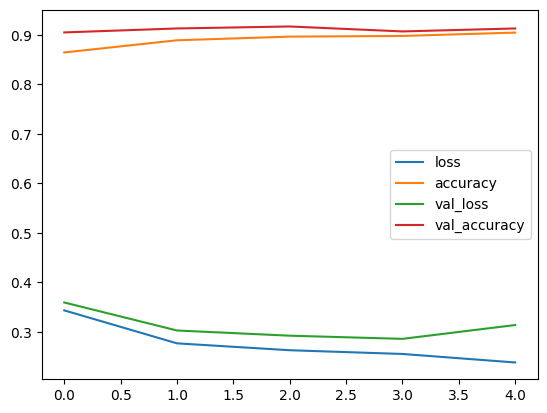

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
import pandas as pd
data_augmentation = tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(20),
    preprocessing.RandomZoom(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2)
])
base_model = tf.keras.applications.resnet50.ResNet50(include_top = False)
base_model.trainable = False
#input layer
inputs = tf.keras.layers.Input(shape = (224,224,3), name = 'input_layer')
x = data_augmentation(inputs)
x = base_model(x, training =False)
x = tf.keras.layers.GlobalAveragePooling2D(name = 'global_pool')(x)#used to return a two-dimensional output
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(64, activation = 'relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(1, activation = 'sigmoid')(x)
model = tf.keras.Model(inputs,outputs)
model.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
              metrics = ['accuracy'])
history = model.fit(train_data, epochs = 5, steps_per_epoch = len(train_data), validation_data =test_data, validation_steps =len(test_data))

pd.DataFrame(history.history).plot()

In [ ]:
base_model.trainable=True
for layer in base_model.layers[:-10]:
  layer.trainable=False
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.0001),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
history3 = model.fit(train_data, epochs = 10, steps_per_epoch = len(train_data), validation_data =test_data, validation_steps =len(test_data),initial_epoch = history.epoch[-1],)
model.save('drive/MyDrive/melanoma')

Epoch 5/10
301/301 [==============================] - 86s 257ms/step - loss: 0.2341 - accuracy: 0.9039 - val_loss: 0.2844 - val_accuracy: 0.9120
Epoch 6/10
301/301 [==============================] - 68s 226ms/step - loss: 0.2166 - accuracy: 0.9137 - val_loss: 0.2790 - val_accuracy: 0.9130
Epoch 7/10
301/301 [==============================] - 70s 230ms/step - loss: 0.2157 - accuracy: 0.9128 - val_loss: 0.2596 - val_accuracy: 0.9160
Epoch 8/10
301/301 [==============================] - 66s 218ms/step - loss: 0.1990 - accuracy: 0.9181 - val_loss: 0.2608 - val_accuracy: 0.9150
Epoch 9/10
301/301 [==============================] - 65s 216ms/step - loss: 0.1946 - accuracy: 0.9234 - val_loss: 0.2595 - val_accuracy: 0.9130
Epoch 10/10
301/301 [==============================] - 64s 213ms/step - loss: 0.1852 - accuracy: 0.9261 - val_loss: 0.2455 - val_accuracy: 0.9200


## By building a custom CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
traindatagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    #unhash the stuff you want data augmentation
    rotation_range = 0.2,
    # shear_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.2,
    # height_shift_range = 0.2,
    # horizontal_flip = True
)
testdatagen_augmented = ImageDataGenerator(
    rescale = 1/255.
)
train_data_augmented = traindatagen_augmented.flow_from_directory(
    directory = 'melanoma_cancer_dataset/train',
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle=True
)
test_data_augmented = testdatagen_augmented.flow_from_directory(
    directory = 'melanoma_cancer_dataset/test',
    target_size = (224,224),
    class_mode = 'binary',
    batch_size = 32,
    shuffle=True
)

Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten
import pandas as pd
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss = 'binary_crossentropy',
               optimizer = 'Adam',
              metrics = ['accuracy'])
model.summary()

#the below model is only fitted with 20% of the data, just to see how it generally performs, so change it when you want it trained on
history = model.fit(train_data_augmented,steps_per_epoch = len(train_data_augmented), validation_data = test_data_augmented, validation_steps = len(test_data_augmented), epochs=10, callbacks = [tf.keras.callbacks.ModelCheckpoint('drive/MyDrive/melanoma2', monitor = 'val_loss', save_best_weights = True)])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [ ]:
history3 = model.fit(train_data_augmented, epochs = 15, steps_per_epoch = len(train_data_augmented), validation_data =test_data_augmented, validation_steps =len(test_data_augmented),initial_epoch = history.epoch[-1],)

Epoch 10/15
301/301 [==============================] - 131s 436ms/step - loss: 0.2341 - accuracy: 0.9038 - val_loss: 0.2253 - val_accuracy: 0.9010
Epoch 11/15
301/301 [==============================] - 127s 423ms/step - loss: 0.2264 - accuracy: 0.9089 - val_loss: 0.2132 - val_accuracy: 0.9110
Epoch 12/15
301/301 [==============================] - 127s 421ms/step - loss: 0.2259 - accuracy: 0.9056 - val_loss: 0.2316 - val_accuracy: 0.8940
Epoch 13/15
301/301 [==============================] - 126s 419ms/step - loss: 0.2263 - accuracy: 0.9070 - val_loss: 0.2242 - val_accuracy: 0.8980
Epoch 14/15
301/301 [==============================] - 122s 405ms/step - loss: 0.2170 - accuracy: 0.9114 - val_loss: 0.2342 - val_accuracy: 0.9050
Epoch 15/15
301/301 [==============================] - 126s 418ms/step - loss: 0.2143 - accuracy: 0.9124 - val_loss: 0.2240 - val_accuracy: 0.9160


In [ ]:
model.save('drive/MyDrive/melanoma3')